In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy import stats
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
pd.options.display.max_rows = 999
import warnings
warnings.filterwarnings('ignore')

# Step 1  Data cleaning 

In [2]:
df = pd.read_csv('/Users/qiuchenwang/Downloads/Kaggle_Salary.csv')
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,6,"60,000-69,999"


In [3]:
# See how many null values are in each column
df.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q2_OTHER_TEXT                              0
Q3                                         0
Q4                                         0
Q5                                         0
Q5_OTHER_TEXT                              0
Q6                                         0
Q7                                         0
Q8                                         0
Q9_Part_1                               6518
Q9_Part_2                               8990
Q9_Part_3                               7607
Q9_Part_4                               9212
Q9_Part_5                               8863
Q9_Part_6                              10194
Q9_Part_7                              11982
Q9_Part_8                              12258
Q9_OTHER_TEXT                              0
Q10                                        0
Q11                                      247
Q12_Part_1

## 1 Handling missing data

### 1.1Multiple Choices Questions (Select all that apply)

For questions that asks respondents to select all that apply, like Q9 "Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice", Q9_part1 is NaN means that she does not choosing the choice "Analyze and understand data to influence product or business decisions". In this case, I simply convert the response into 1 if it is selected, 0 otherwise.

In [4]:
#for example, let's look at the answer in Q9_Part_1
df['Q9_Part_1'].unique()

array([nan,
       'Analyze and understand data to influence product or business decisions'],
      dtype=object)

Since there are many multiple choices questions, I want to implement batch processing.

In [5]:
#list the questions that have multiple choices
multiple_choice = list()
for i in df.columns:
    if i.find('Part')!=-1 and i.find('TEXT')==-1:
        multiple_choice.append(i)
multiple_choice

['Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q12_Part_1',
 'Q12_Part_2',
 'Q12_Part_3',
 'Q12_Part_4',
 'Q12_Part_5',
 'Q12_Part_6',
 'Q12_Part_7',
 'Q12_Part_8',
 'Q12_Part_9',
 'Q12_Part_10',
 'Q12_Part_11',
 'Q12_Part_12',
 'Q13_Part_1',
 'Q13_Part_2',
 'Q13_Part_3',
 'Q13_Part_4',
 'Q13_Part_5',
 'Q13_Part_6',
 'Q13_Part_7',
 'Q13_Part_8',
 'Q13_Part_9',
 'Q13_Part_10',
 'Q13_Part_11',
 'Q13_Part_12',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_10',
 'Q16_Part_11',
 'Q16_Part_12',
 'Q17_Part_1',
 'Q17_Part_2',
 'Q17_Part_3',
 'Q17_Part_4',
 'Q17_Part_5',
 'Q17_Part_6',
 'Q17_Part_7',
 'Q17_Part_8',
 'Q17_Part_9',
 'Q17_Part_10',
 'Q17_Part_11',
 'Q17_Part_12',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_Part_7',
 'Q18_Part_8',
 'Q18_Part_9',
 'Q18_Part_10',
 'Q18

In [6]:
#convert NaN in multiple choices questions to 0
for i in multiple_choice:
    temp_col = df[i]
    df[i].fillna(0, inplace=True)

### 1.2 Multiple choices questions（Select one answer） 

We will handle the missing data based on the missing rate of a column:

1) If the missing rate of a column is less than 5%, we delete the rows with nan value.

2) If the missing rate of a column is between 5%~20%, we convert the nan values to the mode of this column.

3) If the missing rate of a column is above 20%, we should drop this column directly.

In [7]:
#select the questions that have only one answer
data_one = list()
for i in df.columns[1:]:
    if i.find('Part')==-1 and i.find('OTHER')==-1:
        data_one.append(i)
data_one

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q10',
 'Q11',
 'Q14',
 'Q15',
 'Q19',
 'Q22',
 'Q23',
 'Q10_Encoded',
 'Q10_buckets']

In [8]:
df[data_one].isnull().mean()

Q1             0.000000
Q2             0.000000
Q3             0.000000
Q4             0.000000
Q5             0.000000
Q6             0.000000
Q7             0.000000
Q8             0.000000
Q10            0.000000
Q11            0.019765
Q14            0.083620
Q15            0.086021
Q19            0.147555
Q22            0.155797
Q23            0.156518
Q10_Encoded    0.000000
Q10_buckets    0.000000
dtype: float64

In [9]:
#Drop the column which the percentage of missing data is greater than 25%
df = df.dropna(thresh=len(df)/5, axis=1) 

Q11: the missing rate of a column is less than 5%

In [10]:
#Q11:'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?'
#The missing rate of Q11 is less than 5%, we delete the row with nan directly
df = df[pd.notnull(df['Q11'])]

In [11]:
df[data_one].isnull().mean()

Q1             0.000000
Q2             0.000000
Q3             0.000000
Q4             0.000000
Q5             0.000000
Q6             0.000000
Q7             0.000000
Q8             0.000000
Q10            0.000000
Q11            0.000000
Q14            0.065143
Q15            0.067592
Q19            0.130367
Q22            0.138776
Q23            0.139510
Q10_Encoded    0.000000
Q10_buckets    0.000000
dtype: float64

Q14,Q15,Q19,Q22,Q23: the missing rate of a column is between 5%~20%

In [12]:
#Q14:'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice'
# Notice that Q14 include text response, so there are Q14 and TEXT of each part of Q14. So we can only keep Q14.
df['Q14'].value_counts(normalize=True)

Local development environments (RStudio, JupyterLab, etc.)              0.517377
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.182850
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.090203
Other                                                                   0.076057
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.068722
Advanced statistical software (SPSS, SAS, etc.)                         0.064792
Name: Q14, dtype: float64

In [13]:
#Replace NaN with mode.
df.loc[df['Q14'].isnull(), 'Q14'] = 'Local development environments (RStudio, JupyterLab, etc.)'

In [14]:
#Q15:'How long have you been writing code to analyze data (at work or at school)?'
df['Q15'].value_counts(normalize=True)

3-5 years                    0.246717
1-2 years                    0.237524
< 1 years                    0.179391
5-10 years                   0.153126
10-20 years                  0.087901
I have never written code    0.048328
20+ years                    0.047015
Name: Q15, dtype: float64

In [15]:
#Notice that the percentage of '3-5 years' and '1-2 years' are almost the same.
#If we simply fill the nan with the mode, the percentage will change.
df['Q15'] = df['Q15'].fillna(method = 'bfill')

In [16]:
df['Q15'].value_counts(normalize=True)

3-5 years                    0.245714
1-2 years                    0.240245
< 1 years                    0.180816
5-10 years                   0.151592
10-20 years                  0.086449
I have never written code    0.048000
20+ years                    0.047184
Name: Q15, dtype: float64

From the result above we can see that the percentage of the data are basicly the same.

In [17]:
#Q19:'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'
df['Q19'].value_counts(normalize=True)

Python        0.769736
R             0.100723
SQL           0.069089
C++           0.012015
MATLAB        0.010795
Other         0.010607
C             0.007885
Java          0.006571
None          0.005726
Javascript    0.003473
Bash          0.002910
TypeScript    0.000469
Name: Q19, dtype: float64

In [18]:
#Compare Q15 years writting data for rows with NaN in Q19
df[df['Q19'].isnull()]['Q15'].value_counts(normalize=True)

I have never written code    0.368190
1-2 years                    0.183469
3-5 years                    0.149656
< 1 years                    0.141515
5-10 years                   0.083907
10-20 years                  0.040075
20+ years                    0.033187
Name: Q15, dtype: float64

'Q19' is the programming language that you would recommend. According to 'Q15', those who are NaN in 'Q19' is because they have lack of experience in writting code. Replace NaN with the mode.

In [19]:
#Since most of responsers choose python, instead of replace NaN with 'Unknown', we can replace NaN with mode.
df.loc[df['Q19'].isnull(), 'Q19'] = 'Python'

In [20]:
#Q22: 'Have you ever used a TPU (tensor processing unit)?'
df['Q22'].value_counts(normalize=True)

Never         0.806825
Once          0.092512
2-5 times     0.075355
6-24 times    0.013744
> 25 times    0.011564
Name: Q22, dtype: float64

In [21]:
#Since most of responsers choose Never, instead of replace NaN with 'Unknown', we can replace NaN with mode.
df.loc[df['Q22'].isnull(), 'Q22'] = 'Never'

In [22]:
#Q23:'For how many years have you used machine learning methods?'
df['Q23'].value_counts(normalize=True)

< 1 years      0.291054
1-2 years      0.258704
2-3 years      0.148847
3-4 years      0.092496
4-5 years      0.081871
5-10 years     0.079025
10-15 years    0.031306
20+ years      0.016697
Name: Q23, dtype: float64

From the data above, there is no bucket of 15-20 years, probabaly some of the missing data is belong to that bucket. And the percentage of '<1 years' and '1-2 years' are close, so we fill NaN with next valid observation.

In [23]:
df['Q23'] = df['Q23'].fillna(method = 'bfill')

## 2 Encode

### 2.1 Handle special categorical features

There are some special categorical features like "Q1: What is your age (# years)?" which has values '22-24','40-44','50-54', etc. There is an inherent numerical sequence within the values, so we normalise each value with mean value, like 23, 42, 52, etc.

In [24]:
def Range_Normalize(value):
    if isinstance(value, str):
        if '-' in value:
            temp = value.split('-')
            return (float(temp[0])+float(temp[1]))/2
        if '+' in value:
            a = value.split('+')
            return float(a[0])
        else:
            return value
    else:
        return value

In [25]:
#Q1: 'What is your age (# years)?'
df['Q1_NORMAL'] = df['Q1'].apply(Range_Normalize)
data_one.remove('Q1')
data_one.append('Q1_NORMAL')

In [26]:
#Q15: 'How long have you been writing code to analyze data (at work or at school)?'
def Q15Range_Normalize(value):
    mapdict = {'I have never written code':0,'< 1 years':0.5,
              '1-2 years':1.5,'3-5 years':4,'5-10 years':7.5,'10-20 years':15,'20+ years':40}
    return mapdict[value]
df['Q15_NORMAL'] = df['Q15'].apply(Q15Range_Normalize)
data_one.remove('Q15')
data_one.append('Q15_NORMAL')

In [27]:
#Q22: 'Have you ever used a TPU (tensor processing unit)?'
def Q22Range_Normalize(value):
    mapdict = {'Never':0,'Once':1,'2-5 times':3.5,'6-24 times':15,'> 25 times':25}
    return mapdict[value]
df['Q22_NORMAL'] = df['Q22'].apply(Q22Range_Normalize)
data_one.remove('Q22')
data_one.append('Q22_NORMAL')

In [28]:
#Q23:'For how many years have you used machine learning methods?'
def Q23Range_Normalize(value):
    mapdict = {'< 1 years':0.5,'1-2 years':1.5,'2-3 years':2.5,'3-4 years':3.5,'4-5 years':4.5,
               '5-10 years':7.5,'10-15 years':12.5,'20+ years':20}
    return mapdict[value]
df['Q23_NORMAL'] = df['Q23'].apply(Q23Range_Normalize)
data_one.remove('Q23')
data_one.append('Q23_NORMAL')

### 2.1 Handle general categorical features

For those features with no numerical order between different categories, we can simply convert categorical variable into dummy/indicator variables. Pandas get_dummies method is a very straightforward one-step procedure to convert categorical variable into dummy/indicator variables.

In [29]:
#Since the salary is encoded in column Q10_encoded, drop 'Q10','Q10_encoded' and 'Q10_buckets'
data_one.remove('Q10_buckets')
data_one.remove('Q10')
data_one

['Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q11',
 'Q14',
 'Q19',
 'Q10_Encoded',
 'Q1_NORMAL',
 'Q15_NORMAL',
 'Q22_NORMAL',
 'Q23_NORMAL']

In [30]:
selected = multiple_choice + data_one

In [31]:
df_selected=df[selected]
df_selected

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,...,Q7,Q8,Q11,Q14,Q19,Q10_Encoded,Q1_NORMAL,Q15_NORMAL,Q22_NORMAL,Q23_NORMAL
0,0,0,0,0,0,0,0,0,Twitter (data science influencers),0,...,0,I do not know,$0 (USD),"Basic statistical software (Microsoft Excel, G...",Python,3,23.0,1.5,0.0,1.5
1,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,0,0,0,0,0,0,...,20+,"We have well established ML methods (i.e., mod...","> $100,000 ($USD)","Cloud-based data software & APIs (AWS, GCP, Az...",Python,0,42.0,0.0,0.0,2.5
2,0,0,0,0,0,0,0,0,0,0,...,20+,I do not know,"$10,000-$99,999","Local development environments (RStudio, Jupyt...",Python,14,42.0,1.5,1.0,2.5
3,0,0,0,0,0,0,0,0,0,0,...,0,No (we do not use ML methods),$0 (USD),"Local development environments (RStudio, Jupyt...",Python,0,23.0,0.5,0.0,0.5
4,0,0,Build prototypes to explore applying machine l...,0,0,Do research that advances the state of the art...,0,0,0,0,...,3-4,"We have well established ML methods (i.e., mod...","$10,000-$99,999","Advanced statistical software (SPSS, SAS, etc.)",Java,6,52.0,40.0,0.0,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,0,0,0,0,0,0,0,0,0,0,...,0,No (we do not use ML methods),$0 (USD),"Local development environments (RStudio, Jupyt...",Python,0,23.0,1.5,0.0,4.5
12491,0,0,0,0,0,Do research that advances the state of the art...,0,0,0,0,...,0,We use ML methods for generating insights (but...,$1-$99,"Local development environments (RStudio, Jupyt...",Python,0,19.5,1.5,0.0,4.5
12492,Analyze and understand data to influence produ...,0,0,0,0,0,0,0,Twitter (data science influencers),0,...,3-4,We use ML methods for generating insights (but...,$100-$999,"Local development environments (RStudio, Jupyt...",Python,0,23.0,1.5,0.0,4.5
12494,0,0,0,0,0,0,0,0,0,0,...,3-4,I do not know,$0 (USD),"Local development environments (RStudio, Jupyt...",Python,0,19.5,1.5,0.0,4.5


In [32]:
df_encode = pd.get_dummies(df_selected, prefix_sep='_', drop_first=True)
df_encode.head()

,Q10_Encoded,Q1_NORMAL,Q15_NORMAL,Q22_NORMAL,Q23_NORMAL,Q9_Part_1_Analyze and understand data to influence product or business decisions,"Q9_Part_2_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Q9_Part_3_Build prototypes to explore applying machine learning to new areas,Q9_Part_4_Build and/or run a machine learning service that operationally improves my product or workflows,Q9_Part_5_Experimentation and iteration to improve existing ML models,...,Q19_C++,Q19_Java,Q19_Javascript,Q19_MATLAB,Q19_None,Q19_Other,Q19_Python,Q19_R,Q19_SQL,Q19_TypeScript
0,3,23.0,1.5,0.0,1.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,42.0,0.0,0.0,2.5,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,14,42.0,1.5,1.0,2.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,23.0,0.5,0.0,0.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6,52.0,40.0,0.0,12.5,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


# Step 2 Exploratory data analysis

## 1 Present graphical figures to represent trends in the data

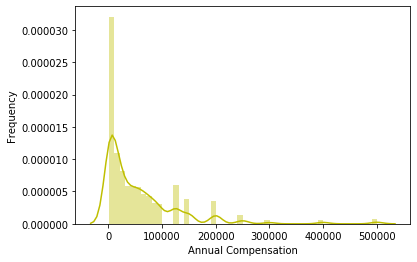

In [33]:
viz = df[['Q4','Q10']]
viz['Q10'] = viz['Q10'].map({'$0-999': 1000, '1,000-1,999': 2000, '2,000-2,999': 3000, '3,000-3,999': 4000, '4,000-4,999': 5000, '5,000-7,499': 7500, '7,500-9,999': 10000, '10,000-14,999': 15000, '15,000-19,999': 20000, '20,000-24,999': 25000, '25,000-29,999': 30000, '30,000-39,999': 40000, '40,000-49,999': 50000, '50,000-59,999': 60000, '60,000-69,999': 70000,  '70,000-79,999': 80000, '80,000-89,999': 90000, '90,000-99,999': 100000, '100,000-124,999': 125000, '125,000-149,999': 150000, '150,000-199,999': 200000, '200,000-249,999': 250000, '250,000-299,999': 300000, '300,000-500,000': 400000, '> $500,000': 500000})
ax = sns.distplot(viz['Q10'], color="y").set(xlabel='Annual Compensation', ylabel='Frequency')

The primary concern for further classification task is existence of outliers in our dataset, so we draw a Histogram showing the distribution of yearly compensation. From 0 to 300,000 the number of respondents keeps dropping. Most respondents annul compensation distributed under 100,000 $USD.

In [34]:
#Yearly compensation comparision between bachelor's degree and master's degree
bachelor_salary_values = np.array(viz[viz['Q4']=='Bachelor’s degree']['Q10'].values)
master_salary_values = np.array(viz[viz['Q4']=='Master’s degree']['Q10'].values)

In [35]:
n = 1000
m = 10000
Nbach = len(bachelor_salary_values)
Nmast = len(master_salary_values)
bachelor_avg_salary = []
master_avg_salary = []
for i in range(m):
    bachelor_avg_salary.append(np.mean(bachelor_salary_values[np.random.randint(Nbach, size=n)]))
    master_avg_salary.append(np.mean(master_salary_values[np.random.randint(Nmast, size=n)]))

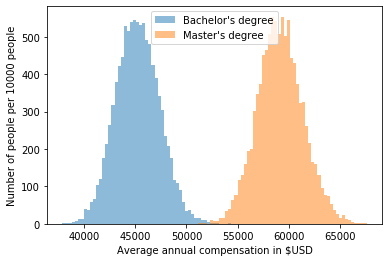

In [36]:
x_min = min(np.min(bachelor_avg_salary),np.min(master_avg_salary))
x_max = max(np.max(bachelor_avg_salary),np.max(master_avg_salary))
x = bachelor_avg_salary
y = master_avg_salary

bins = np.linspace(x_min, x_max, 100)

plt.hist(x, bins, alpha=0.5, label="Bachelor's degree")
plt.hist(y, bins, alpha=0.5, label="Master's degree")
plt.legend(loc='best')
plt.xlabel('Average annual compensation in \$USD')
plt.ylabel('Number of people per 10000 people')
plt.show()

From above figure we can see that the respondents with Master's degree have more annual compensation than the respondents with Bachelor's degree. This feature is informative to the target, so we should keep it.

In [37]:
#Ralationship between Machine Learning Experience and Yearly Compensation
viz1 = df[['Q23','Q10']]
viz1['Q10'] = viz1['Q10'].map({'$0-999': 1000, '1,000-1,999': 2000, '2,000-2,999': 3000, '3,000-3,999': 4000, '4,000-4,999': 5000, '5,000-7,499': 7500, '7,500-9,999': 10000, '10,000-14,999': 15000, '15,000-19,999': 20000, '20,000-24,999': 25000, '25,000-29,999': 30000, '30,000-39,999': 40000, '40,000-49,999': 50000, '50,000-59,999': 60000, '60,000-69,999': 70000,  '70,000-79,999': 80000, '80,000-89,999': 90000, '90,000-99,999': 100000, '100,000-124,999': 125000, '125,000-149,999': 150000, '150,000-199,999': 200000, '200,000-249,999': 250000, '250,000-299,999': 300000, '300,000-500,000': 400000, '> $500,000': 500000})
less_than_1year = np.array(viz1[viz1['Q23']=='< 1 years']['Q10'].values)
two_to_3years = np.array(viz1[viz1['Q23']=='2-3 years']['Q10'].values)

In [38]:
n = 1000
N1year = len(less_than_1year)
N3year = len(two_to_3years)
one_year_avg_salary = []
three_year_avg_salary = []
for i in range(m):
    one_year_avg_salary.append(np.mean(less_than_1year[np.random.randint(N1year, size=n)]))
    three_year_avg_salary.append(np.mean(two_to_3years[np.random.randint(N3year, size=n)]))

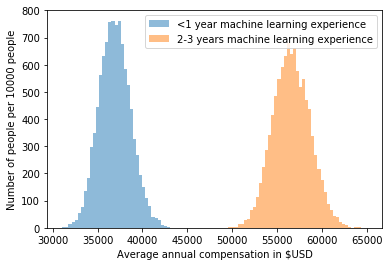

In [39]:
x_min = min(np.min(one_year_avg_salary),np.min(three_year_avg_salary))
x_max = max(np.max(one_year_avg_salary),np.max(three_year_avg_salary))
x = one_year_avg_salary
y = three_year_avg_salary

bins = np.linspace(x_min, x_max, 100)

plt.hist(x, bins, alpha=0.5, label="<1 year machine learning experience")
plt.hist(y, bins, alpha=0.5, label="2-3 years machine learning experience")
plt.legend(loc='best')
plt.xlabel('Average annual compensation in \$USD')
plt.ylabel('Number of people per 10000 people')
plt.show()

From above figure we can see that the respondents with 2-3 years machine learning experience have more annual compensation than the respondents with less than 1 year machine learning experience. This feature is informative to the target, so we should keep it.

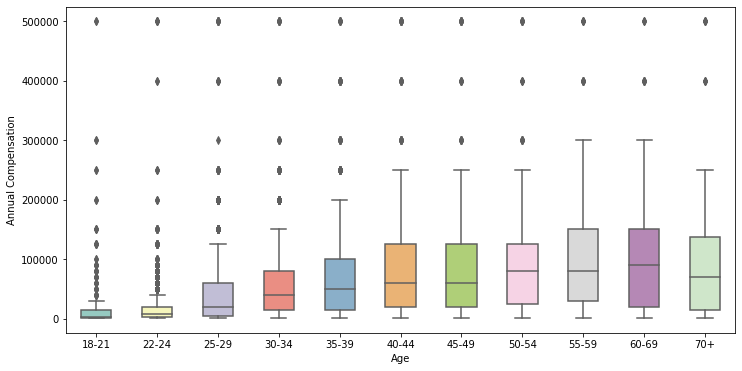

In [40]:
#box plot Age/salary
var = 'Q1'
df['Gender'] = df['Q2']
order=["18-21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-69","70+"]
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y=viz['Q10'], data=df,width=0.5,order=order,palette="Set3").set(xlabel='Age', ylabel='Annual Compensation')

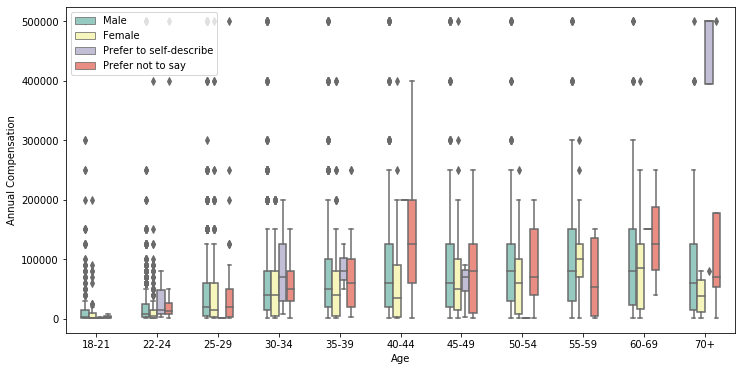

In [41]:
#box plot Age/salary
var = 'Q1'
df['Gender'] = df['Q2']
order=["18-21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-69","70+"]
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y=viz['Q10'],hue='Gender', data=df,width=0.5,order=order,palette="Set3").set(xlabel='Age', ylabel='Annual Compensation')
plt.legend(loc='upper left')
plt.show()

In the above figures, we try to digit into the relationship between Annual Compensation, Age and Gender. Based on the compensation distribution, we can conclude that older people(especially people who aged 50-69) are more likely to have a higher yearly compensation. Besides for some age buckets, only few sample points in 'Prefer to self-describe' or 'Prefer not to say' that cause some fluctuations, gender has little effect on annual income.

## 2 Visualize the order of feature importance

Pearson is the most widely used correlation coefficient, which measures the degree to which a relationship between two variables can be described by a line. Here we use Pearson coefficient to measure the correlation of features in the dataset with Q10 Encoded(Annual Compensation).

Text(0, 0.5, 'correlation with Annual Compensation')

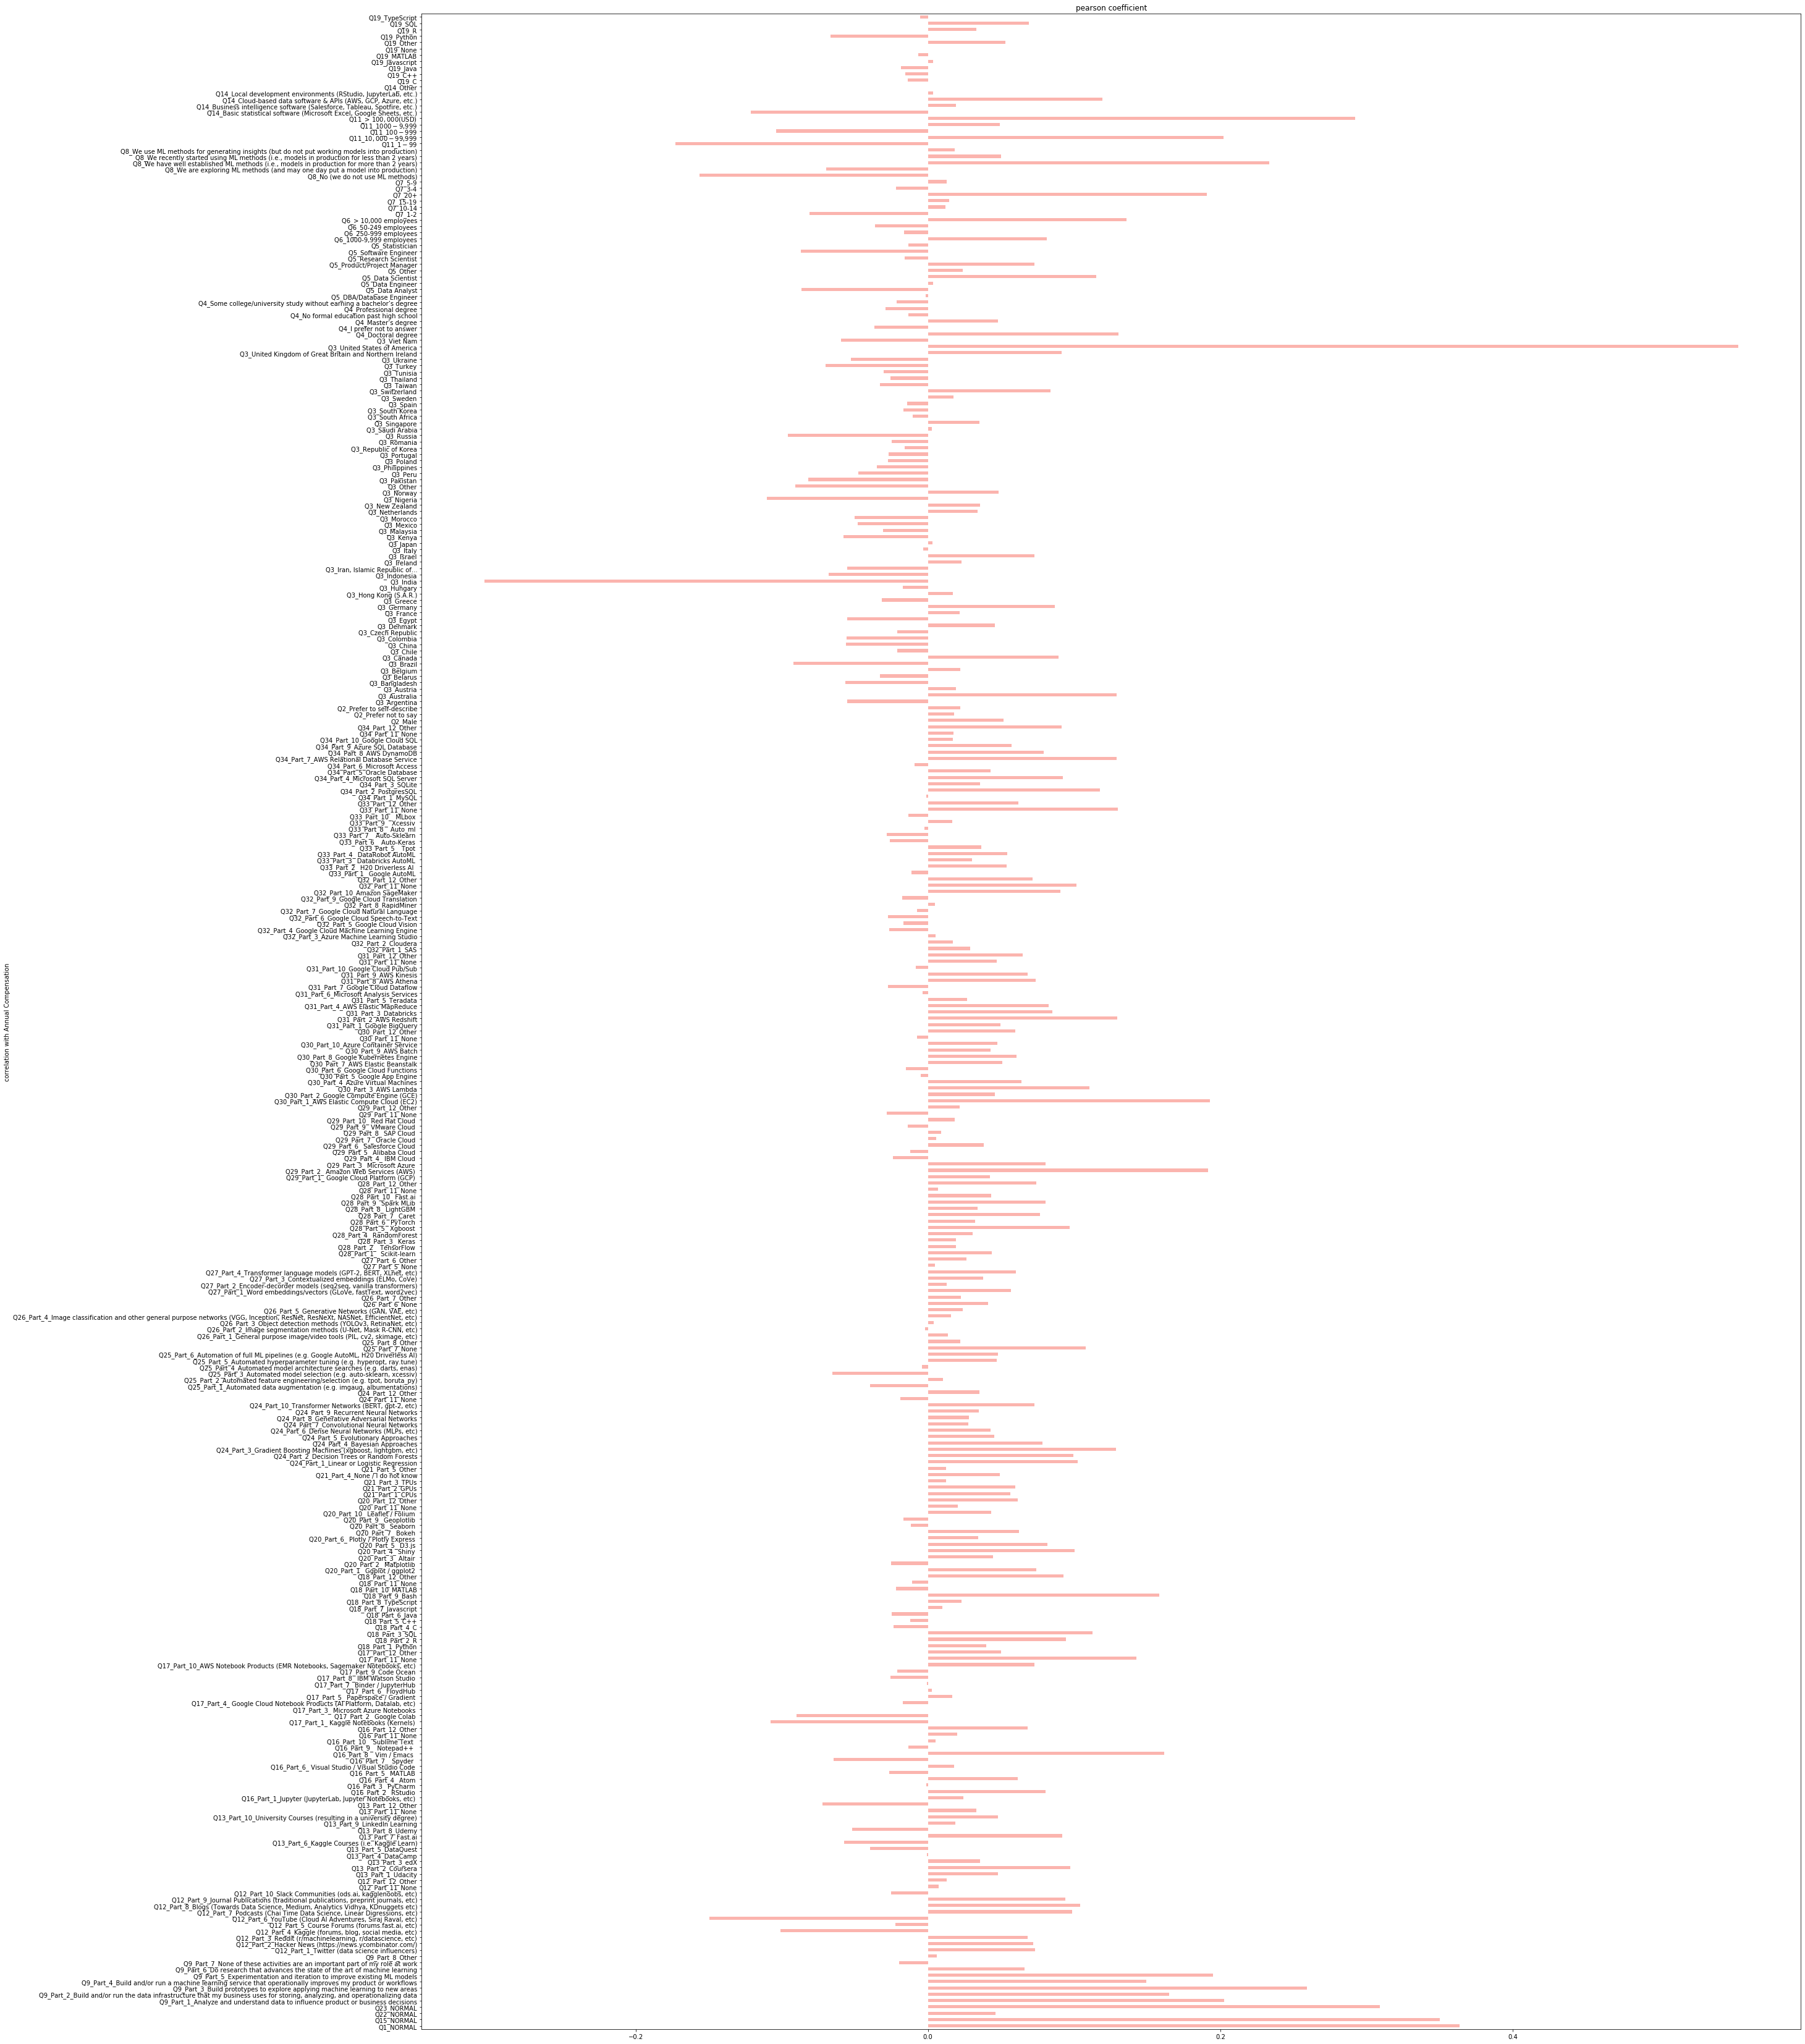

In [42]:
# compute correlation
df_encode_corr = df_encode.corr()['Q10_Encoded'][1:] # 1 because the fist row is Encoded Salary
ax = (df_encode_corr.plot(kind='barh',figsize=(40,60),colormap = 'Pastel1',title="pearson coefficient"))
ax.set_ylabel('correlation with Annual Compensation')

The Pearson coefficient ranges from −1 to 1. If the result is close to 1, implies that the annual compensation increases as the feature increases. If the result is close to −1, implies that the annual compensation decreases as the feature increases. A value of 0 implies that there is no linear correlation between annual compensation and the feature.Therefore, we use the absolute value of pearson coefficient to measure the importance of this variable.

Text(0, 0.5, 'Absolute correlation with YearlyCompensation')

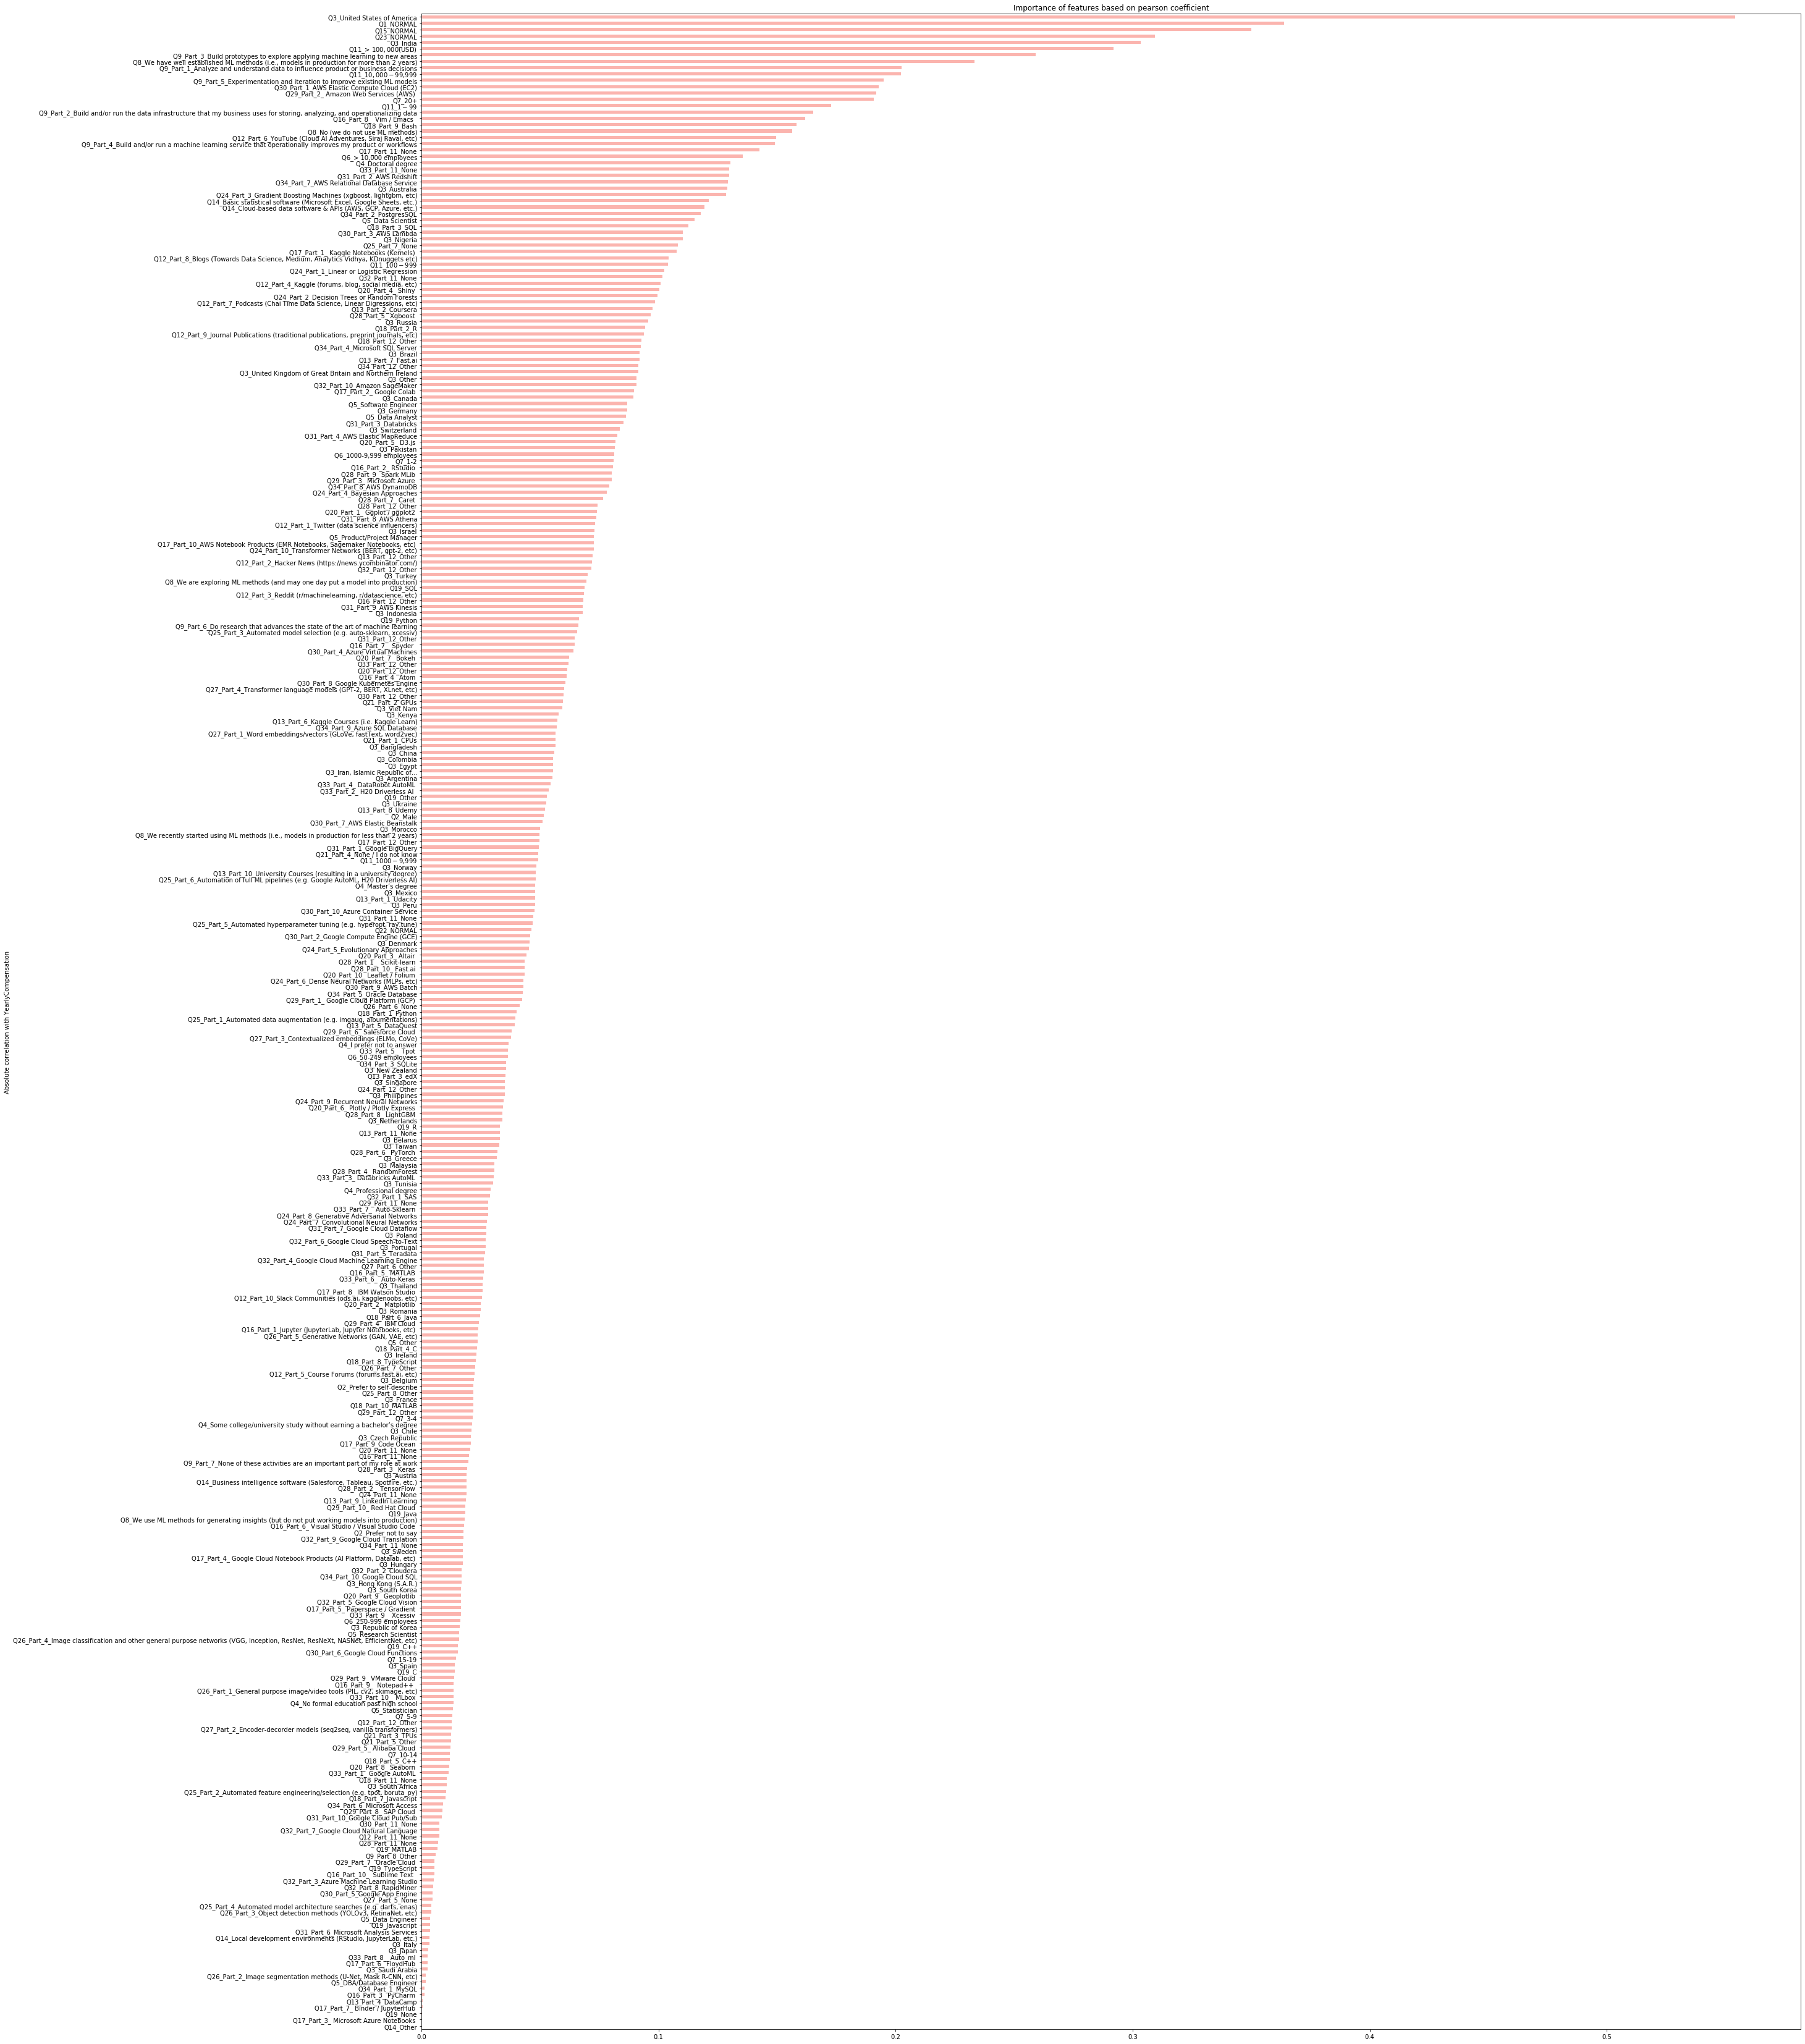

In [43]:
correlation = df_encode_corr.apply(lambda x: abs(x)).sort_values()
ax = (correlation.plot(kind="barh",figsize=(40,60),colormap = 'Pastel1',title="Importance of features based on pearson coefficient"))
ax.set_ylabel('Absolute correlation with YearlyCompensation')

In [44]:
golden_features_list = df_encode_corr[abs(df_encode_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with Salary:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with Salary:
Q3_United States of America                                                                  0.554182
Q1_NORMAL                                                                                    0.363791
Q15_NORMAL                                                                                   0.349944
Q23_NORMAL                                                                                   0.309289
Q11_> $100,000 ($USD)                                                                        0.292039
Q9_Part_3_Build prototypes to explore applying machine learning to new areas                 0.259158
Q8_We have well established ML methods (i.e., models in production for more than 2 years)    0.233403
Q9_Part_1_Analyze and understand data to influence product or business decisions             0.202574
Q11_$10,000-$99,999                                                                          0.202358
Q3_India                      

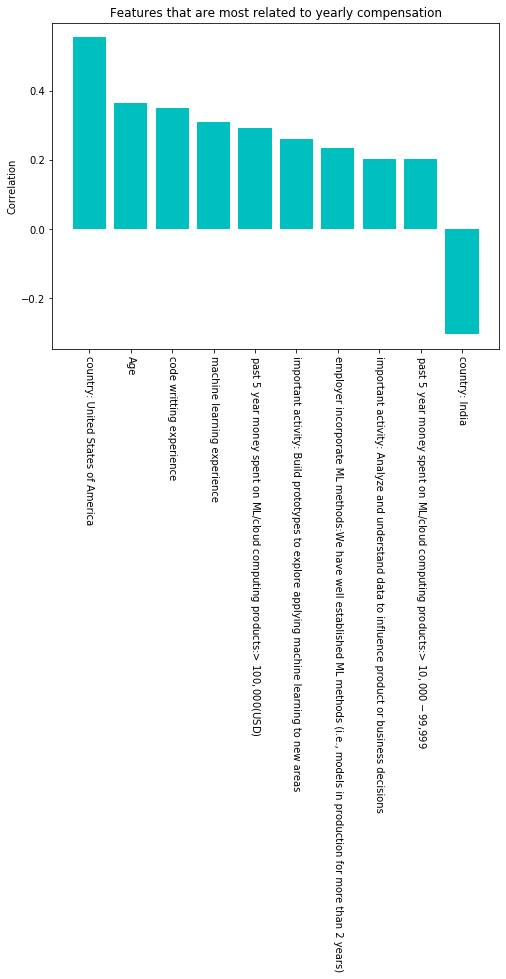

In [45]:
N = 10
ind=np.arange(10) 
fig=plt.figure(figsize=(8,6))
p1 = plt.bar(ind,golden_features_list,color = 'c')
plt.ylabel('Correlation')
plt.title('Features that are most related to yearly compensation')
plt.xticks(ind,('country: United States of America ','Age','code writting experience','machine learning experience',
                'past 5 year money spent on ML/cloud computing products:> $100,000 ($USD)',
                'important activity: Build prototypes to explore applying machine learning to new areas',
                'employer incorporate ML methods:We have well established ML methods (i.e., models in production for more than 2 years)',
                'important activity: Analyze and understand data to influence product or business decisions',
                'past 5 year money spent on ML/cloud computing products:> $10,000-$99,999',
                'country: India'),rotation=270)
plt.savefig('correlation.png')
plt.show() 

# Step 3 Feature selection

#### Explain how feature engineering is a useful tool in machine learning.

Feature engineering is the process of using domain knowledge to extract features via data mining techniques. If feature engineering is done correctly, these selected features can be used to improve the performance of machine learning algorithms.

## 1 Chi-Square Test for Feature Selection

In feature selection, we aim to select the features which are highly dependent on the response. When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates the feature is more dependent on the response and it can be selected for model training.

In [49]:
#seperate data
X = df_encode.drop(['Q10_Encoded'], axis=1)
y = df_encode['Q10_Encoded']

In [50]:
chi_scores = chi2(X,y)
chi_scores

(array([5.28836255e+03, 2.04455557e+04, 9.37525566e+02, 5.08434848e+03,
        2.75980515e+02, 2.56159814e+02, 5.40045008e+02, 2.20124172e+02,
        3.68704615e+02, 8.10551319e+01, 1.39409452e+01, 9.28607288e+00,
        6.33699126e+01, 9.86372496e+01, 6.93141247e+01, 5.11938286e+01,
        1.20303418e+01, 1.78044615e+02, 1.12163337e+02, 9.10397134e+01,
        8.75180318e+01, 2.02260758e+01, 1.87970709e+01, 1.21596211e+01,
        3.97378643e+01, 1.00362351e+02, 5.01848687e+01, 1.39571064e+01,
        3.69535625e+01, 3.70327452e+01, 1.05740732e+02, 3.40171578e+01,
        2.86166871e+01, 5.48076815e+01, 4.67464697e+01, 7.57371101e+01,
        2.36328188e+01, 8.49726700e+01, 2.16761046e+01, 6.02960732e+01,
        1.86443885e+01, 1.65374493e+01, 5.56015339e+01, 3.14194446e+02,
        6.57499937e+01, 2.22459253e+01, 3.27483367e+01, 6.82064149e+01,
        1.15875148e+02, 8.48422397e+01, 1.55069546e+01, 2.13798851e+01,
        1.79372127e+01, 6.73803708e+00, 1.26164316e+01, 4.560133

The first array represents chi square values and the second array represnts p-values.The p-value is the probability of obtaining results as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis.

In [51]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
#p_values_in denotes the features that are not statistically significant
p_values_in = p_values[p_values>0.05]
p_values_in

Q17_Part_6_ FloydHub                                                                                                               0.944339
Q5_Data Engineer                                                                                                                   0.911277
Q19_None                                                                                                                           0.837513
Q9_Part_8_Other                                                                                                                    0.812300
Q34_Part_6_Microsoft Access                                                                                                        0.761703
Q26_Part_2_Image segmentation methods (U-Net, Mask R-CNN, etc)                                                                     0.746210
Q31_Part_10_Google Cloud Pub/Sub                                                                                                   0.716928
Q19_MATLAB          

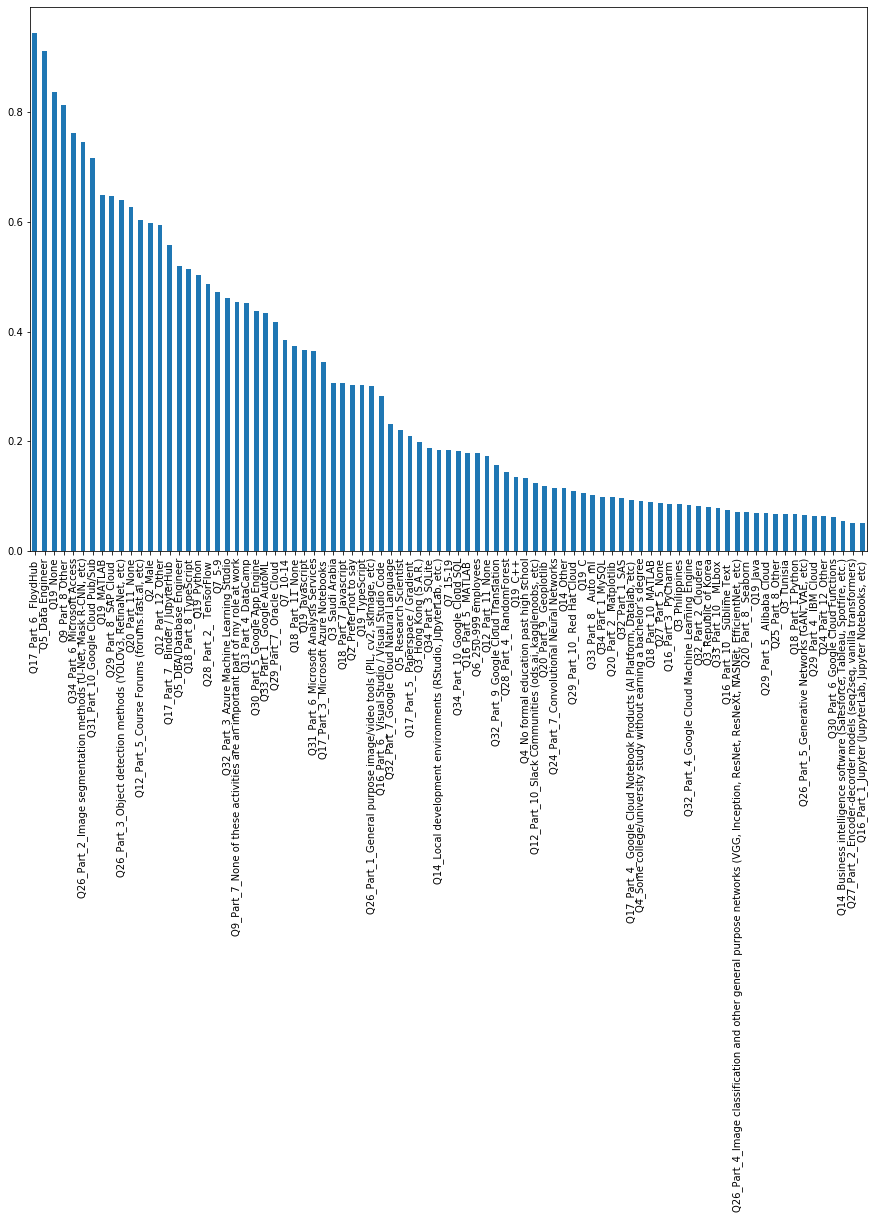

In [52]:
plt.figure(figsize=(15, 10))
p_values_in.plot.bar()

Since these features have higher p-values, it says that these variables are independent of the repsone and can not be considered for model training

In [53]:
#create a new dataframe with selected statistically highly significant as P < 0.001
p_values_select = p_values[p_values<0.05]
feature_index = p_values_select.index
feature_index

Index(['Q7_3-4', 'Q28_Part_11_None', 'Q29_Part_12_Other',
       'Q31_Part_5_Teradata', 'Q28_Part_6_ PyTorch ', 'Q28_Part_3_ Keras ',
       'Q8_We use ML methods for generating insights (but do not put working models into production)',
       'Q32_Part_5_Google Cloud Vision', 'Q26_Part_7_Other',
       'Q29_Part_9_ VMware Cloud ',
       ...
       'Q11_$10,000-$99,999',
       'Q9_Part_3_Build prototypes to explore applying machine learning to new areas',
       'Q8_We have well established ML methods (i.e., models in production for more than 2 years)',
       'Q22_NORMAL', 'Q11_> $100,000 ($USD)', 'Q3_India',
       'Q3_United States of America', 'Q23_NORMAL', 'Q15_NORMAL', 'Q1_NORMAL'],
      dtype='object', length=231)

In [55]:
X=X[feature_index]
X.head()

,Q7_3-4,Q28_Part_11_None,Q29_Part_12_Other,Q31_Part_5_Teradata,Q28_Part_6_ PyTorch,Q28_Part_3_ Keras,Q8_We use ML methods for generating insights (but do not put working models into production),Q32_Part_5_Google Cloud Vision,Q26_Part_7_Other,Q29_Part_9_ VMware Cloud,...,"Q11_$10,000-$99,999",Q9_Part_3_Build prototypes to explore applying machine learning to new areas,"Q8_We have well established ML methods (i.e., models in production for more than 2 years)",Q22_NORMAL,"Q11_> $100,000 ($USD)",Q3_India,Q3_United States of America,Q23_NORMAL,Q15_NORMAL,Q1_NORMAL
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,1.5,1.5,23.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0.0,1,1,0,2.5,0.0,42.0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1.0,0,0,0,2.5,1.5,42.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,1,0,0.5,0.5,23.0
4,1,0,0,0,0,1,0,0,0,0,...,1,1,1,0.0,0,0,0,12.5,40.0,52.0


# Step 4 Model implementation

In [68]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

In [66]:
# using classifier chains
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = []
fold = 0
for train_idx, test_idx in kfold.split(X):
    fold += 1
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    classifier.fit(X_train, y_train)
    
    predictions = classifier.predict(X_test)
    
    acc = metrics.accuracy_score(y_test,predictions)
    accuracy.append(acc)
    
    print ("Fold {}: Accuracy: {}".format(fold, acc))   

print ("Average Score: {}({})".format(np.mean(accuracy),np.std(accuracy)))

Fold 1: Accuracy: 0.2987755102040816
Fold 2: Accuracy: 0.3355102040816327
Fold 3: Accuracy: 0.33224489795918366
Fold 4: Accuracy: 0.3248979591836735
Fold 5: Accuracy: 0.3346938775510204
Fold 6: Accuracy: 0.35836734693877553
Fold 7: Accuracy: 0.3485714285714286
Fold 8: Accuracy: 0.38285714285714284
Fold 9: Accuracy: 0.4114285714285714
Fold 10: Accuracy: 0.41959183673469386
Average Score: 0.35469387755102044(0.03682573751839095)


<module 'matplotlib.pyplot' from '/Users/qiuchenwang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/pyplot.py'>

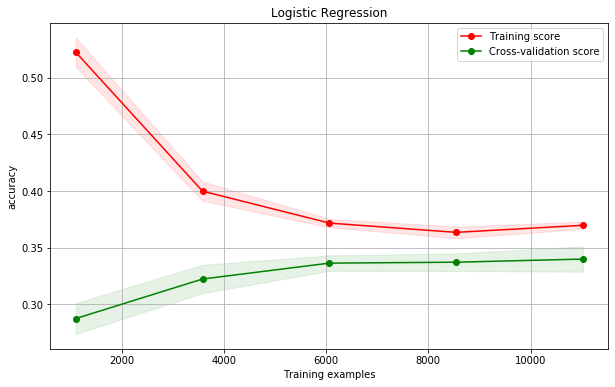

In [69]:
plot_learning_curve(classifier,'Logistic Regression', X, y, cv=10)

# Step 5 Model Tuning

## Randomized Grid Search

In [70]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)

            predictions = model.predict(X_test)


            ACC = metrics.accuracy_score(y_test,predictions)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({})".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a accuracy of {}% with a standard deviation of {}".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.001, 'solver': 'liblinear'}
Best Score: 36.359%(3.59)

The optimal log model uses C=0.001, and a liblinear solver, and has a accuracy of 36.359% with a standard deviation of 3.59


# Step 6 : Testing&Discussion

In [76]:
resultDF = pd.DataFrame(columns=['model','hyperparams','train_r2_score','train_std','test_r2_score','test_std'])
df_idx = 0

In [77]:
def run_kfold(typ, model,hyperparams='default', verbose=0):
    global df_idx
    
    # Initialize scaler
    scaler = StandardScaler()
    
    # Update model hyperparameters if given
    if hyperparams is not 'default':
        model.set_params(**hyperparams)
    
    kf = KFold(n_splits=10) #n_splits previously n_folds
    
    # Initialize storage vectors
    test_outcomes = []
    train_outcomes=[]
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = y.values[train_index], y.values[test_index]
        
        # Scale data
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
       # Fit to training set
        model.fit(X_train, Y_train)
        
        # Make predictions on testing set and training set
        test_predictions = model.predict(X_test)
        train_predictions = model.predict(X_train)

        
        # Calculate the r-squared value of test set and train set(coefficient of determination)
        test_r2_score = r2_score(Y_test, test_predictions)
        train_r2_score = r2_score(Y_train, train_predictions)

        
        test_outcomes.append(test_r2_score)
        train_outcomes.append(train_r2_score)
        
        # Print fold accuracy if verbose level 2
        if verbose == 2:
            print("Fold {0} r2_score: {1}".format(fold, test_r2_score))   
    
    # Print average accuracy and standard deviation of accuracy if verbose level 1
    if verbose == 1:
        mean_outcome = np.mean(test_outcomes)
        mean_train_outcome=np.mean(train_outcomes)
        print("train r2_score: {0}".format(mean_train_outcome)) 
        print("test r2_score: {0}".format(mean_outcome)) 
    
    # Update dataframe
    resultDF.loc[df_idx, 'model'] = typ
    resultDF.loc[df_idx, 'hyperparams'] = str(hyperparams)
    resultDF.loc[df_idx, 'test_r2_score'] = np.mean(test_outcomes)
    resultDF.loc[df_idx, 'test_std'] = np.std(test_outcomes)
    resultDF.loc[df_idx, 'train_r2_score'] = np.mean(train_outcomes)
    resultDF.loc[df_idx, 'train_std'] = np.std(train_outcomes)
    df_idx += 1                                         
        
    
    # Return average testing accuracy, and fitted model
    return np.mean(test_outcomes), model

In [78]:
parameter={'C': 0.001, 'solver': 'liblinear'}
lr = LogisticRegression()
run_kfold('lr',lr,parameter,1)

train r2_score: 0.31113020683792153
test r2_score: 0.26039856887401197


(0.26039856887401197,
 LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False))

Overfitting occurs when the machine learning model captures the noise of the data which happens when the model fits the data too well. Specifically, overfitting occurs when the model shows low bias but high variance which is often a result of an excessively complicated model.On the other hand, underfitting occurs when the machine learning model cannot capture the underlying trend of the data. It happens when the model does not fit the data well enough and shows low variance but high bias. Underfitting is often a result of an excessively simple model.

In our case, our model is underfitting. Although R2 score is higher for training set than testing set, but the gap between them is not large, besides both scores are less than 0.5, which means that the model cannot capture the underlying trend of the data. 

To improve the testing performance, we can add more training data or select more features to train the model.